In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from os import path
from scipy.signal import resample
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
mpl.style.use('seaborn-notebook')
%matplotlib inline
#sorted(mpl.style.available)


#adding local modules
import sys
module_path = path.abspath(path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from preprocess.biodarw_feature_extraction import extract_residues, extract_radio
from utils import load_biodarw

# setting up variables
doc_path = "/data/elekin/doc"
coefficients=17
et = "T001"
ct ="C01"

%matplotlib inline

In [2]:
metadf=pd.read_csv(path.join("/data/elekin/doc","metadata-202208-v1.csv"),index_col=0)
#metadf.head(16)

In [3]:
dataset=load_biodarw(metadf.index, metadf['abs_path'])
dataset.head(1)

,x,y,timestamp,pen_up,azimuth,altitude,pressure,subject_id
0,3880,5330,1368624260328,1,120,590,1229,C107_2


In [4]:
def local_radio(x, y):  
    """np.sqrt((L['x']-L['x'][0])**2 + (L['y']-L['y'][0])**2)"""
    
    #return np.sqrt((x)**2 + (y)**2)
    return np.sqrt((x-x[0])**2 + (y-y[0])**2)

def local_extract_radio(L, n=None):
    """

    :param L:
    :param n:
    :return:
    """
    x = L['x'].values if n is None else resample(L['x'].values, n)
    y = L['y'].values if n is None else resample(L['y'].values, n)
    return local_radio(x, y)

<AxesSubplot:>

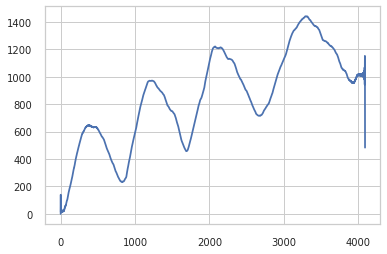

In [5]:
r = dataset.groupby('subject_id').apply(local_extract_radio, n=4096)
r_df = pd.DataFrame(r.tolist(), index=r.index)
r_df.loc['C01_1'].plot()

<AxesSubplot:>

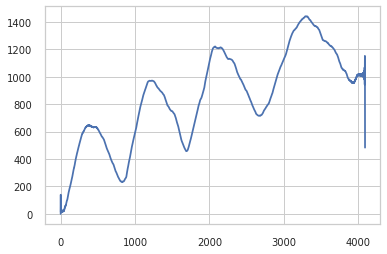

In [6]:
r = dataset.groupby('subject_id').apply(extract_radio, n=4096)
r_df = pd.DataFrame(r.tolist(), index=r.index)
r_df.loc['C01_1'].plot()

<AxesSubplot:>

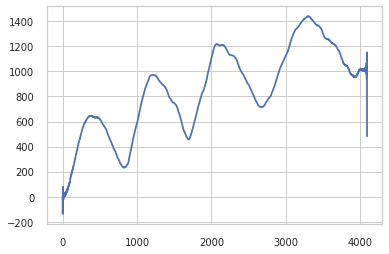

In [7]:
r = dataset.groupby('subject_id').apply(extract_radio).apply(resample,num=4096)
r_df = pd.DataFrame(r.tolist(), index=r.index)
r_df.loc['C01_1'].plot()

Loading labels based on clinic, residues and features from residues.


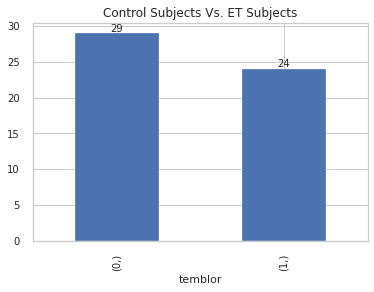

In [8]:
y = pd.read_csv("/data/elekin/data/results/handwriting/binary_labels_20220903.csv", index_col=0)
y = (y == 'si').astype('int8')
ax = y.value_counts().plot.bar(title='Control Subjects Vs. ET Subjects', x='counts')
_ = ax.bar_label(ax.containers[0])

In [9]:
rd = dataset.groupby('subject_id').apply(extract_residues, c=coefficients).apply(resample, num=4096)
rd_df = pd.DataFrame(rd.tolist(), index=rd.index)

In [10]:
r_df.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
subject_id,,,,,,,,,,,,,,,,,,,,,
C07_2,0.000000e+00,-784.294711,291.425485,538.560971,-446.128701,-366.563180,1575.228716,3444.216866,3815.290971,3458.328095,...,4929.607166,4883.477702,4731.532187,4867.556487,5023.035066,4734.425509,4617.011366,5231.866841,5178.972737,2928.779385
C102_2,-3.602795e-12,-236.529277,-81.113792,9.627268,-7.639935,299.983830,1316.237555,2842.978564,4163.396462,4663.239826,...,3095.005420,3189.635462,2987.488514,2697.013813,2702.678886,3100.134042,3477.497682,3248.575295,2241.962028,925.794800
C05_2,4.899635e-14,-159.833281,56.581078,65.061056,-57.577754,-14.045086,56.113264,-2.724954,-29.090466,31.854854,...,1330.175517,1335.810068,1264.743702,1299.178950,1377.458986,1284.185944,1216.518599,1408.357760,1409.382598,765.564262
T009,7.643024e-13,-207.544028,-135.609155,42.848922,142.819395,103.707274,2.620233,-47.445664,-8.307974,62.762140,...,1574.082300,1546.134335,1454.262282,1394.216308,1455.265814,1611.807559,1704.838238,1551.203474,1099.545438,497.175112
T001,-8.809332e-13,-153.859677,96.991485,20.938221,-66.393894,42.064875,23.908366,-40.326775,23.218961,24.155338,...,1387.408068,1451.079472,1451.203631,1373.109528,1454.822348,1481.668205,1328.555808,1454.851377,1604.376375,945.921056
C08,8.551376e-13,-470.945912,443.493606,-183.211189,-51.841724,221.675349,-174.205606,85.317381,95.283486,-121.718630,...,4926.811136,5107.532733,5034.269612,5049.355582,4949.195216,5154.268520,4965.181845,4807.228795,5635.086174,3858.600673
T012_1,2.285143e-12,-351.657177,-90.519079,211.845362,137.737610,-123.564207,-144.402460,100.568001,216.998070,11.544365,...,1989.256750,2046.150394,2134.779313,2106.488123,1978.445665,1974.798654,2197.416199,2341.348680,1943.422132,971.319636
C07_1,3.232263e-13,-148.026411,23.791490,86.386765,-15.619679,-43.893982,31.121923,41.957482,-17.198169,-16.931397,...,1233.481772,1177.737911,1177.600828,1246.423098,1222.269137,1106.296128,1133.492862,1295.067572,1180.844583,602.870975
C101_2,6.349927e-13,-456.098824,59.807273,225.693080,778.793033,2425.541177,3811.216543,3708.896980,3101.259192,3242.279646,...,4766.101992,4479.716875,4392.571890,4776.766509,4795.023607,4263.238268,4367.749293,5207.934057,4824.104278,2383.333651


<AxesSubplot:>

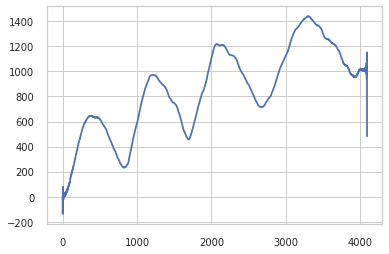

In [11]:
r_df.loc['C01_1'].plot()

In [12]:
r_df.loc['C03_1']

0      -1.043044e-12
1      -1.649788e+02
2      -6.104772e+00
3       9.263647e+01
4       9.934336e+00
            ...     
4091    1.162491e+03
4092    1.257616e+03
4093    1.396439e+03
4094    1.198598e+03
4095    5.908629e+02
Name: C03_1, Length: 4096, dtype: float64

Verify that the data calculated with airflow is correct

In [13]:
#this data has been previously processed by airflow
features = pd.read_csv("/data/elekin/data/results/handwriting/tmp/residues_17_20220827.csv")
features = features.set_index(features.columns[0]).T
print("Loaded data from CSV")
features.sample(5)

Loaded data from CSV


Unnamed: 0,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
T006,0.000000e+00,-1173.605997,-173.729298,2077.103209,3876.778928,4407.265039,4153.838898,3941.147027,4015.450551,4124.720881,...,4331.936263,4314.371172,4430.525921,4495.835611,4347.331878,4231.606876,4513.808879,4902.513146,4401.640978,2458.656783
C06_2,1.687179e-14,-4.946557,43.579429,16.570374,49.703080,28.714994,33.806047,33.803393,25.256388,41.015351,...,308.690366,321.214172,309.136671,317.779443,316.786663,307.004893,330.599581,291.797139,346.733127,274.484649
T002_2,3.184227e-13,-21.646589,40.064119,92.653404,89.661032,66.744137,71.582486,98.221312,109.356643,96.632918,...,207.818730,223.666945,250.431670,252.595900,236.657148,250.643731,308.624658,345.042251,281.005757,129.941339
T011_1,-1.676488e-13,-67.532222,-16.312614,43.071575,39.157227,-1.694090,-16.820635,6.618535,28.045732,18.516658,...,471.764143,501.772182,512.001629,485.282817,462.080175,496.564770,571.175524,584.386005,451.113200,209.265230
C104_1,4.943341e+02,198.369470,3044.647424,3013.741664,3109.264621,3013.582458,3086.038921,3028.528779,3090.034561,3038.141014,...,2834.291476,2881.932642,2828.650952,2889.222792,2819.247115,2902.148350,2800.721151,2931.183142,2749.168605,3043.524821


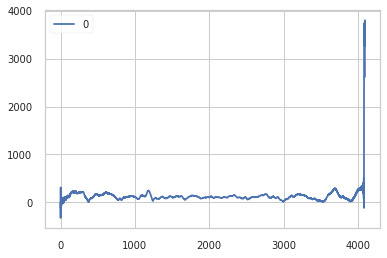

In [14]:
_=pd.DataFrame(resample(extract_residues(dataset[ dataset['subject_id'] == 'C08' ][['x', 'y']], c=coefficients), 4096)).plot()

<AxesSubplot:xlabel='Unnamed: 0'>

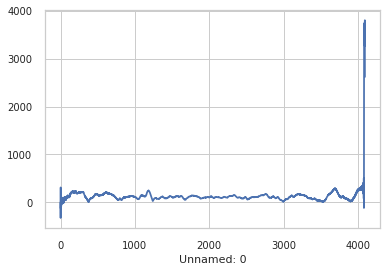

In [15]:
features.loc['C08'].plot()

In [16]:
rd_df.shape, features.shape

((53, 4096), (53, 4096))

In [17]:
labels = (metadf["temblor"] == 'si').astype('int8')
#labels = (metadf["level"]).astype('int8')
labels.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
random_state = 0

X_train=rd_df
y_train=labels.values

In [19]:
# Reduce dimension with LDA
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(X_train, y_train)
X_train_lda=lda.transform(X_train)

In [20]:
df_lda=pd.DataFrame(X_train_lda, columns=["LDA1"])#temblor
#df_lda=pd.DataFrame(X_train_lda, columns=["component1", "component2"])#level
df_lda["labels"]=y_train.T
df_lda.head()

,LDA1,labels
0,-0.125569,0
1,1.421766,0
2,-2.230315,0
3,-0.334537,0
4,-0.608911,0


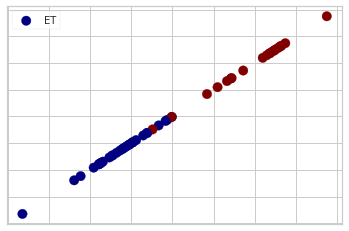

In [59]:
ax = df_lda.plot.scatter(x="LDA1", y="LDA1", c="labels", cmap="jet", s=90, colorbar=False)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.xaxis.set_ticklabels([])
ax.legend(['ET','ET'])
_ = ax.yaxis.set_ticklabels([])

In [22]:
# Reduce dimension to 2 with PCA
pca = make_pipeline(StandardScaler(),
                    PCA(n_components=3, random_state=random_state))
# Fit the method's model
pca.fit(X_train, y_train)
X_train_pca=pca.transform(X_train)

In [23]:
df_pca=pd.DataFrame(X_train_pca, columns=["PCA0", "PCA1","PCA2"])
df_pca["labels"]=y_train.T
df_pca.head()

,PCA0,PCA1,PCA2,labels
0,-63.925871,-0.006942,0.032608,0
1,-61.465363,0.472232,0.138988,0
2,-57.812550,0.342200,0.118356,0
3,-58.237942,-0.256787,0.782946,0
4,-60.420189,0.082563,0.275475,0


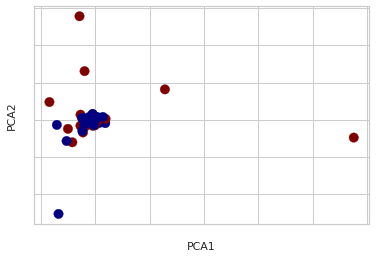

In [65]:
ax = df_pca.plot.scatter(x="PCA1", y="PCA2", c="labels", cmap="jet", s=90, colorbar=False)
ax.xaxis.set_ticklabels([])
_ = ax.yaxis.set_ticklabels([])

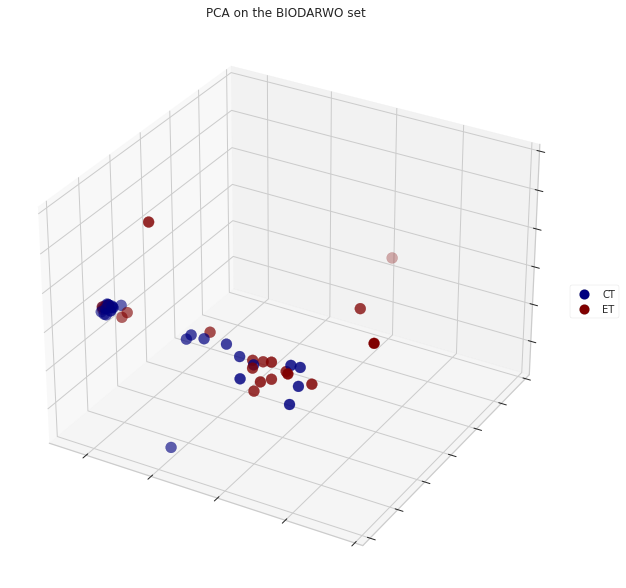

In [54]:
# Plot initialisation
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(111, projection='3d')


sc=ax.scatter(df_pca['PCA0'], 
              df_pca['PCA1'], 
              df_pca['PCA2'], c=df_pca.labels, cmap="jet", s=120)
    
# label the axes
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_zlabel(None)
ax.set_title("PCA on the BIODARWO set")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

colors = [sc.cmap(sc.norm(i)) for i in [0.0, 1.0, 2.0]]

custom_lines = [plt.Line2D([],[], ls="", marker='.', 
                mec='k', mfc=c, mew=.1, ms=20) for c in colors]
import collections
legend = ['CT','ET']#temblor
ax.legend(custom_lines, legend, loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()

In [29]:
from sklearn.model_selection import LeaveOneOut, KFold
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate, train_test_split

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import precision_score, confusion_matrix, ConfusionMatrixDisplay, classification_report


score='accuracy'
X = X_train
y = y_train

loo = LeaveOneOut()

In [35]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(X, y, test_size=0.33, random_state=38)
Counter(ys_train), Counter(ys_test)

(Counter({0: 23, 1: 12}), Counter({0: 9, 1: 9}))

$$ Accuracy: \frac{TP + TN}{TP + TN + FP + FN} $$ 

$$    Recall: \frac{TP}{TP + FN} $$

$$    Precision: \frac{TP}{TP + FP} $$

$$    Specifity: \frac{TN}{TN + FP} $$

Where TP, TN, FP, and FN are, respectively, the true positive, true negative, false positive and false negative values
of the confusion matrix. The positive case corresponds to the ET subjects while the negative case to the CT ones.

**Equations explained**

* Sensitivity/recall – how good a test is at detecting the positives. A test can cheat and maximize this by always returning “positive”. From the whole positive cases how many of them where properly detected.
* Specificity – how good a test is at avoiding false alarms. A test can cheat and maximize this by always returning “negative”.
* Precision – how many of the positively classified were relevant. A test can cheat and maximize this by only returning positive on one result it’s most confident in. 

The cheating is resolved by looking at both relevant metrics instead of just one. E.g. the cheating 100% sensitivity that always says “positive” has 0% specificity.


In [36]:
# predictive model
clf = SVC(kernel='rbf', gamma=0.2, C=10**3)

In [37]:
cv = cross_validate(clf, X, y, cv=loo, scoring=score, return_train_score=True, n_jobs=-1)
print("CV train score svm: {}".format(cv['train_score'].mean()))
print("CV test score svm: {}".format(cv['test_score'].mean()))

CV train score svm: 1.0
CV test score svm: 0.6037735849056604


In [38]:
ho = clf.fit(Xs_train, ys_train)
print("Holdout train score svm: {}".format(ho.score(Xs_train, ys_train)))
print("Holdout test score svm: {}".format(ho.score(Xs_test, ys_test)))

Holdout train score svm: 1.0
Holdout test score svm: 0.5


In [39]:
predictions = clf.predict(Xs_test)
#cm = confusion_matrix(ys_test, predictions, labels=clf.classes_)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
#disp.plot(cmap=plt.cm.Blues)
#_=plt.axis('off')

In [40]:
print(classification_report(ys_test, predictions, target_names=['ET','CT']))

              precision    recall  f1-score   support

          ET       0.50      1.00      0.67         9
          CT       0.00      0.00      0.00         9

    accuracy                           0.50        18
   macro avg       0.25      0.50      0.33        18
weighted avg       0.25      0.50      0.33        18



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is “specificity”.

In [41]:
# RandomForest
clf = RandomForestClassifier(n_estimators=10)

cv = cross_validate(clf, X, y, cv=loo, scoring=score, return_train_score=True, n_jobs=-1)

print("CV train score RandomForest: {}".format(cv['train_score'].mean()))
print("CV test score RandomForest: {}".format(cv['test_score'].mean()))

CV train score RandomForest: 0.9702467343976777
CV test score RandomForest: 0.6792452830188679


In [42]:
ho = clf.fit(Xs_train, ys_train)
print("Holdout train score svm: {}".format(ho.score(Xs_train, ys_train)))
print("Holdout test score svm: {}".format(ho.score(Xs_test, ys_test)))

Holdout train score svm: 1.0
Holdout test score svm: 0.2777777777777778


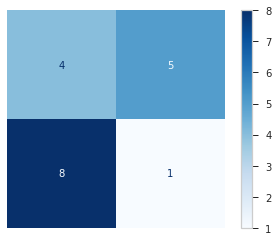

In [43]:
predictions = clf.predict(Xs_test)
cm = confusion_matrix(ys_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
_=plt.axis('off')

In [44]:
print(classification_report(ys_test, predictions, target_names=['ET','CT']))

              precision    recall  f1-score   support

          ET       0.33      0.44      0.38         9
          CT       0.17      0.11      0.13         9

    accuracy                           0.28        18
   macro avg       0.25      0.28      0.26        18
weighted avg       0.25      0.28      0.26        18



In [45]:
# Knn
clf = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree', metric='euclidean')

cv = cross_validate(clf, X, y, cv=loo, scoring=score, return_train_score=True, n_jobs=-1)

print("CV train score knn: {}".format(cv['train_score'].mean()))
print("CV test score knn: {}".format(cv['test_score'].mean()))

CV train score knn: 0.79100145137881
CV test score knn: 0.6981132075471698


In [46]:
ho = clf.fit(Xs_train, ys_train)
print("Holdout train score svm: {}".format(ho.score(Xs_train, ys_train)))
print("Holdout test score svm: {}".format(ho.score(Xs_test, ys_test)))

Holdout train score svm: 0.6857142857142857
Holdout test score svm: 0.5


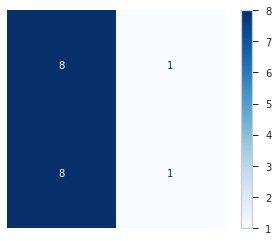

In [47]:
predictions = clf.predict(Xs_test)
cm = confusion_matrix(ys_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
_=plt.axis('off')

In [48]:
print(classification_report(ys_test, predictions, target_names=['ET','CT']))

              precision    recall  f1-score   support

          ET       0.50      0.89      0.64         9
          CT       0.50      0.11      0.18         9

    accuracy                           0.50        18
   macro avg       0.50      0.50      0.41        18
weighted avg       0.50      0.50      0.41        18



In [49]:
# predictive model
clf = LDA()

cv = cross_validate(clf, X, y, cv=loo, scoring=score, return_train_score=True, n_jobs=-1)

print("CV train score LDA: {}".format(cv['train_score'].mean()))
print("CV test score LDA: {}".format(cv['test_score'].mean()))

CV train score LDA: 0.9238026124818576
CV test score LDA: 0.4528301886792453


In [50]:
ho = clf.fit(Xs_train, ys_train)
print("Holdout train score svm: {}".format(ho.score(Xs_train, ys_train)))
print("Holdout test score svm: {}".format(ho.score(Xs_test, ys_test)))

Holdout train score svm: 0.8857142857142857
Holdout test score svm: 0.5


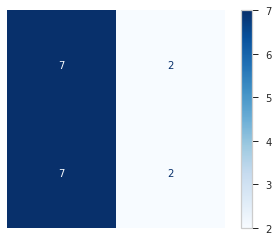

In [51]:
predictions = clf.predict(Xs_test)
cm = confusion_matrix(ys_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
_=plt.axis('off')

In [52]:
print(classification_report(ys_test, predictions, target_names=['ET','CT']))

              precision    recall  f1-score   support

          ET       0.50      0.78      0.61         9
          CT       0.50      0.22      0.31         9

    accuracy                           0.50        18
   macro avg       0.50      0.50      0.46        18
weighted avg       0.50      0.50      0.46        18

